# Apprentissage statistique
## TP 4 - Selection
### Baptiste Martinez F4

### Sélection de caractéristiques
Implémentation de la méthode SAC

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.misc import imread
from sklearn import manifold, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [119]:
def SAC(d):
    # chaque ligne est un individu (c'est généralement le cas)
    X = np.loadtxt('carcinomeX.txt', usecols = np.arange(0, 174))
    y = np.loadtxt('carcinomeY.txt', usecols = 0)
    P = []
    score = []
    #ou bien score = np.array(0,2*d)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.8)
    clf = SVC(kernel = 'linear')
    for j in range(0,d):
        # A chaque itération, on écrase la SVM et
        # on stocke uniquement le score
        
        # Reshape(-1, 1) permet de dire que l'on veut toutes
        # les lignes en une seule colonne
        clf.fit(X[:,j].reshape(-1,1), y) 
        ypred = clf.predict(Xtrain[:,j].reshape(-1,1))
        P.append(accuracy_score(ypred, ytrain))
    
    # tri de liste par ordre décroissant
    P.sort(reverse = True)
    for i in range(1, d):
        m1 = np.mean(P[0:i])
        m2 = np.mean(P[i+1:])
        var1 = np.var(P[0:i])
        var2 = np.var(P[i+1:])
        score.append(np.abs(m1 - m2)/(var1 + var2)) 
        #ou bien score = np.array(np.abs(m1 - m2)/(var1 + var2))
    

In [120]:
SAC(10)

D:\Anaconda3_5.0.1\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda3_5.0.1\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda3_5.0.1\lib\site-packages\numpy\core\fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
D:\Anaconda3_5.0.1\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
D:\Anaconda3_5.0.1\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Challenge

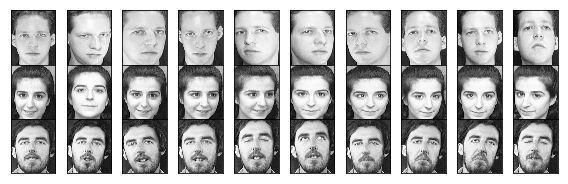

In [109]:
################
## EXERCICE 2 ##
################

# pour la svc mettre gamma à 0.01 et C à 10

X = np.zeros((400,92*112))
y = np.zeros(400)
A = next(os.walk('orl'))
for j,dirs in enumerate(A[1]):
    files = next(os.walk(os.path.join(A[0],dirs))) #lit chacun des sous-dossiers
    for i,f in enumerate(files[2]):
      y[i+10*j] = j
      X[i+10*j] = (imread(os.path.join(files[0], f))).reshape(-1)

nbInd = 3
fig, axes = plt.subplots(nbInd,10, figsize=(10,nbInd),subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0, wspace=0)
for ax, k in zip(axes.flat, range(10*nbInd)):
    ax.imshow(X[k].reshape((112,92)), cmap='Greys_r')

plt.show()

SAC: 
X : n*d
=> on construit d SVM, 1 par dimension: SVC.fit(X[:,i], y)
<br> P = -sort(-[perf1, perf2, ..., perfd])
<br> N.B.: par défaut, Python trie par ordre croissant et on a besoin de l'ordre décroissant donc on ajoute 2 moins (" - ").

Pour i de 1 à d:
    m1 <- moy(P[0:d])
    m2 <- moy(P[d+1:])
    v1 <- var(P[0:d])
    v2 <- var(P[d+1:])
    
score(d) = abs(m1 - m2) / (v1 + v2)